In [2]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt
from torch.autograd import Variable
import time

In [3]:
#线性回归

In [4]:
#Hyper Parameters超参数设置
input_size = 1
output_size = 1
num_epochs = 60
learning_rate = 0.001

In [5]:
#toy dataset
x_train = np.array([[3.3], [4.4], [5.5], [6.71], [6.93], [4.168], 
                    [9.779], [6.182], [7.59], [2.167], [7.042], 
                    [10.791], [5.313], [7.997], [3.1]],
dtype=np.float32)
y_train = np.array([[1.7], [2.76], [2.09], [3.19], [1.694], [1.573], 
                    [3.366], [2.596], [2.53], [1.221], [2.827], 
                    [3.465], [1.65], [2.904], [1.3]],
dtype=np.float32)
print('x_train= ',x_train)
print('y_train= ',y_train)

x_train=  [[  3.29999995]
 [  4.4000001 ]
 [  5.5       ]
 [  6.71000004]
 [  6.92999983]
 [  4.16800022]
 [  9.77900028]
 [  6.18200016]
 [  7.59000015]
 [  2.16700006]
 [  7.04199982]
 [ 10.79100037]
 [  5.3130002 ]
 [  7.99700022]
 [  3.0999999 ]]
y_train=  [[ 1.70000005]
 [ 2.75999999]
 [ 2.08999991]
 [ 3.19000006]
 [ 1.69400001]
 [ 1.57299995]
 [ 3.36599994]
 [ 2.59599996]
 [ 2.52999997]
 [ 1.22099996]
 [ 2.8269999 ]
 [ 3.46499991]
 [ 1.64999998]
 [ 2.90400004]
 [ 1.29999995]]


In [6]:
#创建一个线性回归模型
class LinearRegression(nn.Module):
    def __init__(self, input_size, output_size):
        super(LinearRegression, self).__init__()
        self.linear = nn.Linear(input_size, output_size)  
    
    def forward(self, x):
        out = self.linear(x)
        return out

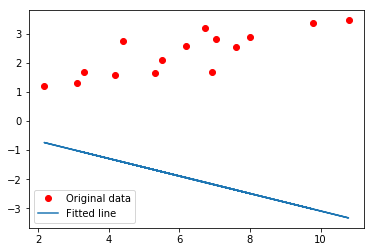

In [7]:
model = LinearRegression(input_size,output_size)
#画图
predicted = model(Variable(torch.from_numpy(x_train))).data.numpy()
plt.plot(x_train, y_train, 'ro', label='Original data')
plt.plot(x_train, predicted, label='Fitted line')
plt.legend()
plt.show()

In [8]:
#损失和优化
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

In [9]:
#训练模型
for epoch in range(num_epochs):
    inputs = Variable(torch.from_numpy(x_train))
    targets = Variable(torch.from_numpy(y_train))
    #forword+backword+optimize
    optimizer.zero_grad()
    outputs = model(inputs)
    loss = criterion(outputs,targets)
    loss.backward()
    optimizer.step()
    if(epoch+1)%5 == 0:
        print('Epoch [%d/%d], Loss: %.4f'
              %(epoch+1, num_epochs, loss.data[0]))

Epoch [5/60], Loss: 9.7529
Epoch [10/60], Loss: 4.0939
Epoch [15/60], Loss: 1.8012
Epoch [20/60], Loss: 0.8723
Epoch [25/60], Loss: 0.4959
Epoch [30/60], Loss: 0.3433
Epoch [35/60], Loss: 0.2814
Epoch [40/60], Loss: 0.2562
Epoch [45/60], Loss: 0.2459
Epoch [50/60], Loss: 0.2416
Epoch [55/60], Loss: 0.2397
Epoch [60/60], Loss: 0.2389


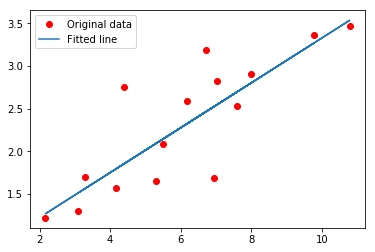

In [22]:
#画图
predicted = model(Variable(torch.from_numpy(x_train))).data.numpy()
plt.plot(x_train, y_train, 'ro', label='Original data')
plt.plot(x_train, predicted, label='Fitted line')
plt.legend()
plt.show()